<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Colab" data-toc-modified-id="Colab-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Colab</a></span></li><li><span><a href="#Load-the-Libraries" data-toc-modified-id="Load-the-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the Libraries</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Choose-Prince-Musician-data-as-timeseries" data-toc-modified-id="Choose-Prince-Musician-data-as-timeseries-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Choose Prince Musician data as timeseries</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Add-lag-columns" data-toc-modified-id="Add-lag-columns-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Add lag columns</a></span></li><li><span><a href="#Add-bias-term" data-toc-modified-id="Add-bias-term-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Add bias term</a></span></li></ul></li><li><span><a href="#Add-timeseries-features" data-toc-modified-id="Add-timeseries-features-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Add timeseries features</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Train Test split</a></span></li><li><span><a href="#Modelling:-Xgboost" data-toc-modified-id="Modelling:-Xgboost-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Modelling: Xgboost</a></span></li></ul></li><li><span><a href="#Adding-timeseries-features-using-tsfresh" data-toc-modified-id="Adding-timeseries-features-using-tsfresh-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Adding timeseries features using tsfresh</a></span></li><li><span><a href="#Using-Pipeline-for-tsfresh-relevant-feature-augmenter" data-toc-modified-id="Using-Pipeline-for-tsfresh-relevant-feature-augmenter-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Using Pipeline for tsfresh relevant feature augmenter</a></span></li><li><span><a href="#Cross-validation-for-timeseries" data-toc-modified-id="Cross-validation-for-timeseries-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Cross validation for timeseries</a></span></li><li><span><a href="#Time-Taken" data-toc-modified-id="Time-Taken-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Time Taken</a></span></li></ul></div>

# Data Description

Reference: https://www.kaggle.com/c/web-traffic-time-series-forecasting/data

```
Original data: train_1.csv
-----------------------------
rows = 145,063
columns = 551
first column = Page
date columns = 2015-07-01, 2015-07-02, ..., 2016-12-31 (550 columns)
file size: 284.6 MB
              
              
Data for modelling: Prince Musician
-------------------------------------------------------
timeseries  : 2016 page visits for Prince 

lag columns : lag1 to lag7
bias        : bias column

For ARIMA   : we have only one timeseries (one column)
For sklearn : For linear regressor, ensemble learners we can have many columns
```

# Sktime
References
- [github: alan-turing-institute/sktime](https://github.com/alan-turing-institute/sktime)
- [github: sktime/sktime-tutorial-pydata-amsterdam-2020](https://github.com/sktime/sktime-tutorial-pydata-amsterdam-2020)
- [towardsdatascience: Sktime: a Unified Python Library for Time Series Machine Learning](https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55)

sktime is an open-source Python toolbox for machine learning with time series.
It is a community-driven project funded by the [UK Economic and Social Research Council](https://esrc.ukri.org/),
the [Consumer Data Research Centre](https://www.cdrc.ac.uk/),
and [The Alan Turing Institute](https://turing.ac.uk/).

- `sktime` is under development (2020), the api may change in future.
- `sktime` interoperates nicely with sklearn.
- `sktime` has ARIMA models from pyramid arima [pmdarima](https://github.com/alkaline-ml/pmdarima) package.

# Colab

In [ ]:
import time

time_start_notebook = time.time()

In [2]:
mkdir -p ~/.kaggle

In [3]:
# !echo '' > ~/.kaggle/kaggle.json


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

# after we have ~/.kaggle/kaggle.json file in colab, we can install kaggle module.

In [5]:
!head -c 20 ~/.kaggle/kaggle.json

{"username":"bhishan

In [6]:
%%capture
# capture will not print in notebook

import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## install modules
    !pip install watermark
    !pip install tsfresh
    !pip install sktime

    ## create project like folders
    !mkdir -p ../data ../outputs ../images ../reports ../html ../models

    !pip install kaggle

In [7]:
# !kaggle competitions files -c web-traffic-time-series-forecasting

In [8]:
!kaggle competitions download -c web-traffic-time-series-forecasting -f train_1.csv.zip -p ../data/

train_1.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!ls ../data

most_visited_2016.csv train_1.csv.zip       train_1_01?raw=true   train_1_02?raw=true   train_1_03?raw=true


# Load the Libraries

In [10]:
# data science
#============================================================
import numpy as np
import pandas as pd

# plotting
#============================================================
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('fivethirtyeight') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

# imports
#============================================================
import functools
import gc
import os
import time
import joblib
SEED=100
np.random.seed(SEED)

# Jupyter notebook settings for pandas
#============================================================
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

#sklearn
#============================================================
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# imports
#============================================================

import scipy
from scipy import stats



# sktime
#============================================================
import sktime
import sktime.forecasting.arima

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sktime.utils.plotting.forecasting import plot_ys

from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA

from sktime.performance_metrics.forecasting import smape_loss
from sktime.forecasting.compose import ReducedRegressionForecaster




# versions
#============================================================
import watermark
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

Bhishan Poudel 2020-10-18 

CPython 3.7.9
IPython 7.18.1

compiler   : Clang 10.0.0 
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

seaborn    0.11.0
pandas     1.0.5
numpy      1.19.2
matplotlib 3.2.2
watermark  2.0.2
joblib     0.17.0
scipy      1.5.2
sklearn    0.23.2
sktime     0.4.2



In [11]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Useful Scripts

MAPE - Mean Absolute Percentage Error:
$$
M A P E=\frac{100}{n} \sum_{i=1}^{n} \frac{\left|y_{i}-\hat{y}_{i}\right|}{y_{i}}
$$


SMAPE - Symmetric Mean Absolute Percentage Error:

$$
S M A P E = \frac{100 \%}{n} \sum_{i=1}^{n} \frac{\left|y_{i} - \hat{y}\right|}{\left(\left|y_i\right| + \left|\hat{y}\right|\right) / 2}\\
\quad \quad = \frac{200 \%}{n} \sum_{i=1}^{n} \frac{\left|y_{i} - \hat{y}\right|}{ \left|y_i\right| + \left|\hat{y}\right|}
$$

Python
```python
from sktime.performance_metrics.forecasting import smape_loss
```

In [12]:
def show_methods(method, ncols=7):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [i for i in dir(method) if i[0]!='_']
    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [13]:
def get_mape(y_true, y_pred):
    "Mean Absolute Percentage Error"
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def get_smape(y_true, y_pred):
    "Symmetric Mean Absolute Percentage Error"
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 200 * np.mean(diff)

def get_ts_eval(model_name, desc, ytest, ypreds, df_eval=None,
                          show=True,sort_col='SMAPE'):
    """Timeseries evaluation
    
    Parameters
    ----------
    model_name: str
        Name of the model. e.g. 'xgboost'
    desc: str
        Description of the model. e.g. 'grid search'
    ytest: list, array, pandas series
        Actual test data.
    ypreds: list, array, pandas series
        Predicted values.
    df_eval: pandas dataframe
        Evaluation datataframe
    show: bool
       Whether or not to display the styled dataframe.
    sort_col: str
        Name of sorting column to sort the dataframe.
        
        
    Usage
    -------
    df_eval = get_ts_eval('xgboost','default',ytest,ypreds,df_eval)
    

    """
    from scipy.stats.stats import pearsonr
    from statsmodels.tsa.stattools import acf
    
    # make numpy array
    ytest = np.array(ytest).flatten()
    ypreds = np.array(ypreds).flatten()

    if df_eval is None:
        df_eval = pd.DataFrame({'Model': [],
                                'Description':[],
                                'MAPE': [],
                                'SMAPE': [],
                                'RMSE': [],
                                'ME': [],
                                'MAE': [],
                                'MPE': [],
                                'CORR': [],
                                'MINMAX': [],
                                'ACF1': [],
                                })

    mape = get_mape(ytest,ypreds)   # MAPE
    smape = get_smape(ytest,ypreds) # SMAPE
    rmse = np.mean((ytest - ypreds)**2)**.5  # RMSE

    me = np.mean(ytest - ypreds)             # ME
    mae = np.mean(np.abs(ytest - ypreds))    # MAE
    mpe = np.mean((ytest - ypreds)/ytest)    # MPE

    corr,pvalue = pearsonr(ytest,ypreds)  # corr

    mins = np.amin(np.hstack([ytest[:, None],
                              ypreds[:, None]]), axis=1)
    maxs = np.amax(np.hstack([ytest[:, None],
                              ypreds[:, None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    acf1 = acf(ytest-ypreds, fft=False)[1]    # ACF1 (autocorrelation function)

    row = [model_name, desc, mape, smape,rmse, me,mae,mpe,corr,minmax,acf1]

    df_eval.loc[len(df_eval)] = row
    df_eval = df_eval.drop_duplicates(['Model','Description'])
    
    asc, cmap = True, 'Greens_r'
    
    if sort_col == 'RMSE':
        asc = False
        cmap = 'Greens'

    if sort_col == 'SMAPE':
        asc = True
        cmap = 'Greens_r'

    df_eval = df_eval.sort_values(sort_col,ascending=asc)
    df_eval = df_eval.reset_index(drop=True)

    if show:
        df_eval_style = (df_eval.style
                         .format({'MAPE': "{:,.0f}",
                                  'SMAPE': "{:,.4f}",
                                  'RMSE': "{:,.0f}",
                                  'ME': "{:,.0f}",
                                  'MAE': "{:,.0f}",
                                  'MPE': "{:,.0f}",
                                  'CORR': "{:,.4f}",
                                  'MINMAX': "{:,.4f}",
                                  'ACF1': "{:,.4f}"
                                 })
                         .background_gradient(subset=[sort_col],cmap=cmap)
                        )
        display(df_eval_style)
    return df_eval

df_eval = None

In [14]:
def plot_model_results(model,Xtrain, ytrain,Xtest,ytest,ypreds,
                       n_splits=5,
                       plot_intervals=False,
                       plot_anomalies=False):
    """Plot model performance for timeseries data.

    """
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import TimeSeriesSplit
    
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # plot
    plt.figure(figsize=(14, 8))
    plt.plot(ytest, "green", label="actual", linewidth=2.0)
    plt.plot(ypreds, "blue", label="ypreds", linewidth=2.0)

    tscv = TimeSeriesSplit(n_splits=n_splits)
    if plot_intervals:
        score_cv = cross_val_score(model,Xtrain,ytrain,
                                    cv=tscv,
                                    scoring="neg_mean_absolute_error")
        mae = score_cv.mean() * (-1)
        deviation = score_cv.std()

        scale = 1.96
        lower = ypreds - (mae + scale * deviation)
        upper = ypreds + (mae + scale * deviation)

        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)

        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(ytest))
            anomalies[ytest<lower] = ytest[ytest<lower]
            anomalies[ytest>upper] = ytest[ytest>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")

    mape_error = get_mape(ytest, ypreds)
    smape_error = get_smape(ytest, ypreds)

    title = "MAPE : {:.2f} \nSMAPE: {:.2f}".format(mape_error, smape_error)
    plt.title(title)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

# Load the data

In [15]:
@functools.lru_cache(maxsize=None)
def read_data():
    df = pd.read_csv('../data/train_1.csv.zip',compression='zip')
    cond = df['Page'] == "Prince_(musician)_en.wikipedia.org_all-access_all-agents"
    df = df.loc[cond]

    df = df.filter(regex="Page|2016")
    df = df.melt(id_vars=['Page'],var_name='date',value_name='visits').drop('Page',axis=1)
    df['date'] = pd.to_datetime(df['date'])
    return df


,date,visits
0,2016-01-01,20947.0
1,2016-01-02,19466.0
2,2016-01-03,8587.0
3,2016-01-04,7386.0
4,2016-01-05,7719.0


num nans =  0
type ts = <class 'pandas.core.series.Series'>


date
2016-01-01    20947.0
2016-01-02    19466.0
2016-01-03     8587.0
2016-01-04     7386.0
2016-01-05     7719.0
Name: visits, dtype: float64

The yaxis is truncated in the plot


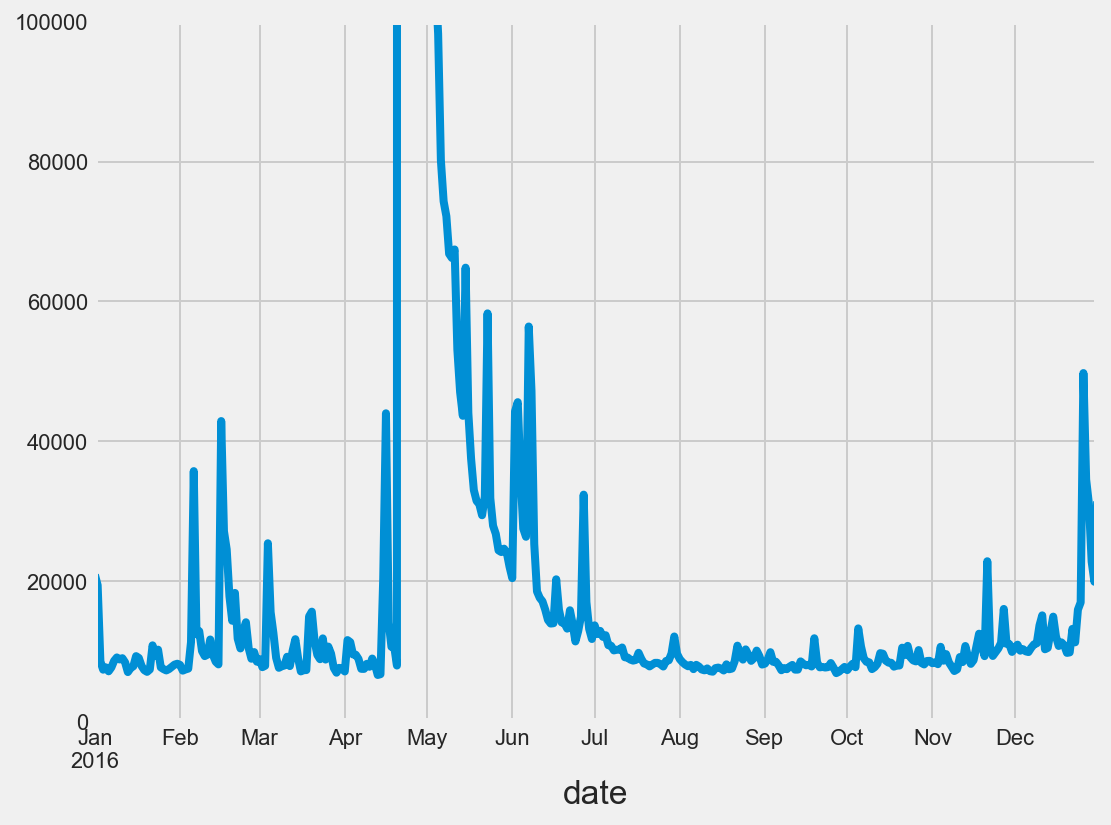

In [16]:
df = read_data()
display(df.head())

num_nans = df['visits'].isna().sum()
print('num nans = ', num_nans)

ts = df['visits']
ts.index = df['date']
print(f"type ts = {type(ts)}")
display(ts.head())

ts.plot(figsize=(8,6))
plt.ylim(0,100_000)
print('The yaxis is truncated in the plot')

# Module API: sktime

In [17]:
show_methods(sktime)

,0,1,2,3,4,5,6
0,base,exceptions,forecasting,performance_metrics,show_versions,transformers,utils


In [18]:
show_methods(sktime.forecasting)

,0,1,2,3,4,5,6
0,FH,arima,base,compose,model_selection,naive,


In [19]:
# we need to import whole sktime.forecasting.arima
# only importing sktime does not work
import sktime.forecasting.arima
show_methods(sktime.forecasting.arima)

,0,1,2,3,4,5,6
0,AutoARIMA,BaseSktimeForecaster,DEFAULT_ALPHA,OptionalForecastingHorizonMixin,np,pd,


In [20]:
show_methods(sktime.forecasting.base)

,0,1,2,3,4,5,6
0,BaseForecaster,is_forecaster,,,,,


In [21]:
show_methods(sktime.forecasting.model_selection)

,0,1,2,3,4,5,6
0,CutoffSplitter,ForecastingGridSearchCV,SingleWindowSplitter,SlidingWindowSplitter,temporal_train_test_split,,


In [22]:
show_methods(sktime.performance_metrics.forecasting)

,0,1,2,3,4,5,6
0,MASE,make_forecasting_scorer,mase_loss,sMAPE,smape_loss,,


# Modelling

In [23]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting.forecasting import plot_ys

In [24]:
ts.head(2).append(ts.tail(2))

date
2016-01-01    20947.0
2016-01-02    19466.0
2016-12-30    19956.0
2016-12-31    31446.0
Name: visits, dtype: float64

## Train test split using sktime
- sktime DOES NOT support datetime index, make it integers.

In [25]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.model_selection import train_test_split
from sktime.utils.plotting.forecasting import plot_ys

In [26]:
y = ts
y_train, y_test = temporal_train_test_split(ts) # same as sklearn shuffle=False
print(f'shape y: {y.shape}')
print(f'shape y_train: {y_train.shape}')
print(f'shape y_test: {y_test.shape}')

shape y: (366,)
shape y_train: (274,)
shape y_test: (92,)


shape y_train: (274,)
shape y_test: (92,)


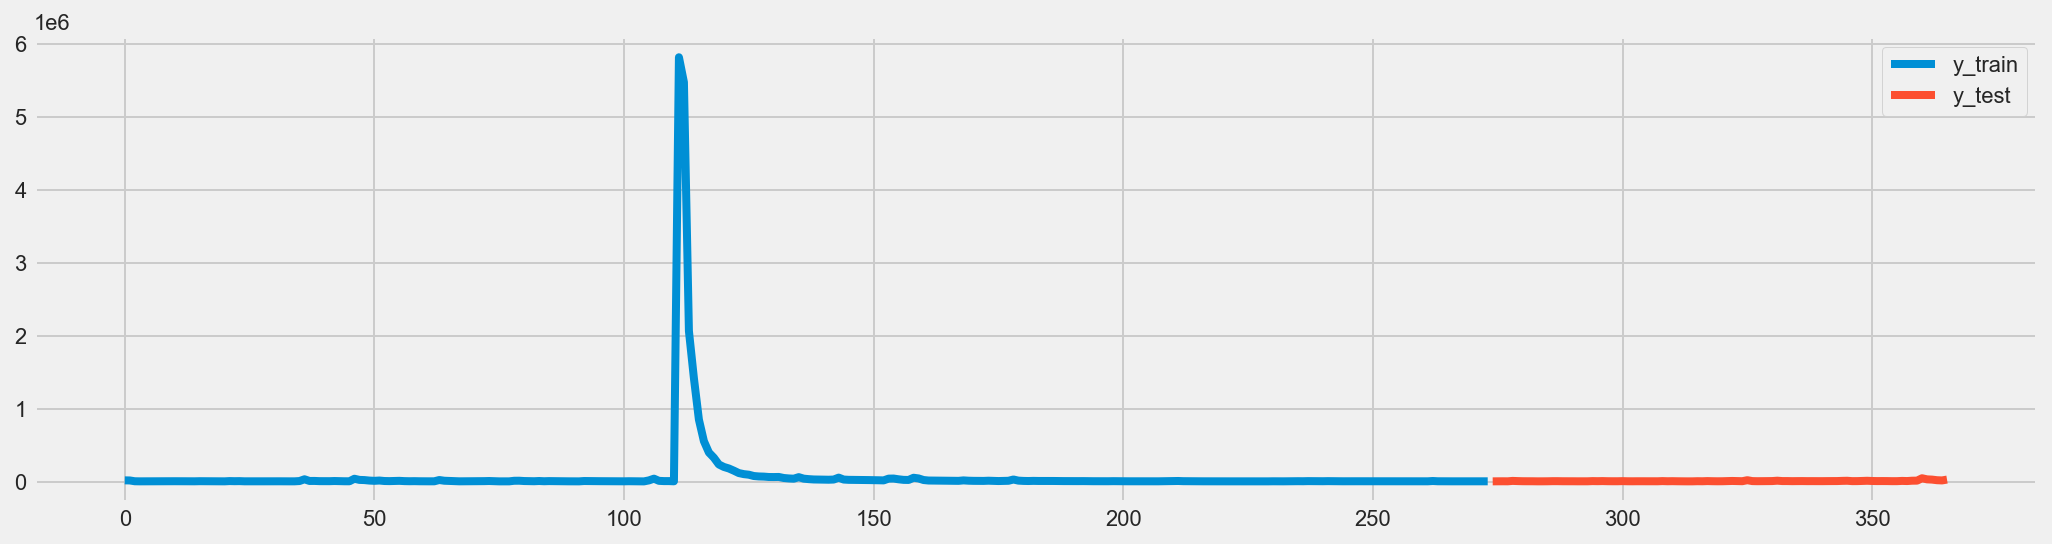

In [27]:
# date: Oct 18, 2020
# sktime version 0.4.2 , plot_ys does not work with datetime index.

y.index = range(len(y))
y_train, y_test = train_test_split(y,train_size=0.75,shuffle=False)
print(f'shape y_train: {y_train.shape}')
print(f'shape y_test: {y_test.shape}')

plot_ys(y_train, y_test, labels=["y_train", "y_test"]) 
plt.show()

## Modelling: naive model

/Users/poudel/opt/miniconda3/envs/tsa/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/poudel/opt/miniconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


,Model,Description,MAPE,SMAPE,RMSE,ME,MAE,MPE,CORR,MINMAX,ACF1
0,naive_forecaster,strategy=last,24,30.3809,"7,348","3,777","3,815",0,nan,0.2394,0.6551


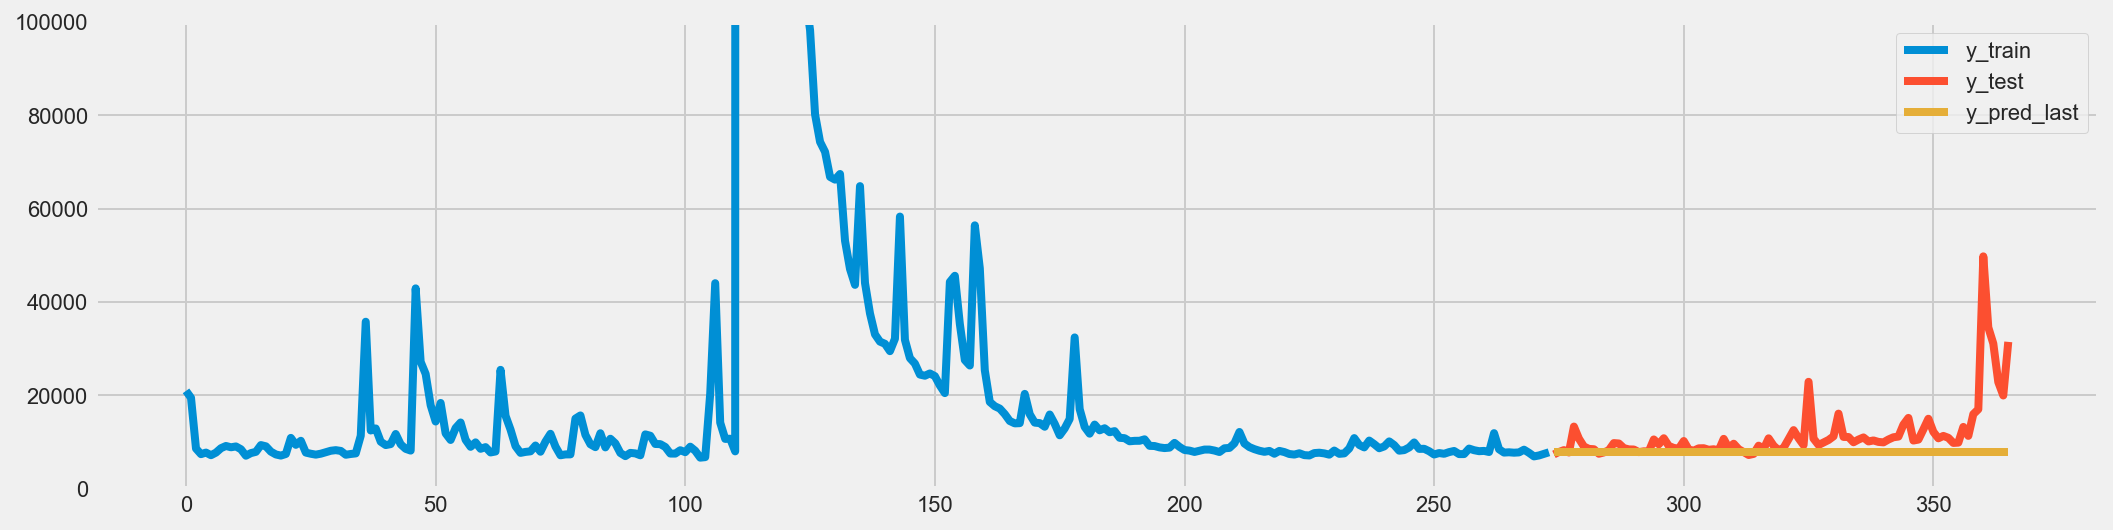

In [29]:
from sktime.forecasting.naive import NaiveForecaster


naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)

# forecaster horizon
fh = np.arange(len(y_test)) + 1

# predict
y_pred = naive_forecaster_last.predict(fh)

# plot
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred_last"]);
plt.ylim(0,100_000)

# model evaluation
df_eval = get_ts_eval('naive_forecaster','strategy=last',y_test,y_pred,df_eval)

In [30]:
smape_loss(y_test, y_pred)

0.3038086129022403

In [32]:
y_test[:5], y_pred[:5]

(274     7330.0
 275     7847.0
 276     8247.0
 277     7742.0
 278    13292.0
 Name: visits, dtype: float64,
 274    7783.0
 275    7783.0
 276    7783.0
 277    7783.0
 278    7783.0
 dtype: float64)

In [34]:
get_mape(y_test, y_pred)

23.95788313446125

In [36]:
get_smape(y_test, y_pred)

30.380861290224033

# Modelling: Random Forest using sklearn and Reduced Regression using sktime

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import ReducedRegressionForecaster

In [38]:
ReducedRegressionForecaster?

Signature:
ReducedRegressionForecaster(
    regressor,
    strategy='recursive',
    window_length=10,
    step_length=1,
)
Docstring:
Forecasting based on reduction to tabular regression.

When fitting, a rolling window approach is used to first transform the
target series into panel data which is
then used to train a regressor. During prediction, the last available
data is used as input to the
fitted regressors to make forecasts.

Parameters
----------
regressor : a regressor

References
----------
..[1] Bontempi, Gianluca & Ben Taieb, Souhaib & Le Borgne, Yann-Aël. (
2013).
  Machine Learning Strategies for Time Series Forecasting.
File:      ~/opt/miniconda3/envs/tsa/lib/python3.7/site-packages/sktime/forecasting/compose/_reduce.py
Type:      function


/Users/poudel/opt/miniconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


,Model,Description,MAPE,SMAPE,RMSE,ME,MAE,MPE,CORR,MINMAX,ACF1
0,naive_forecaster,strategy=last,24,30.3809,"7,348","3,777","3,815",0,nan,0.2394,0.6551
1,random_forest,window_length=7,241,96.2428,"32,563","-21,745","22,737",-2,-0.1260,0.6312,0.0634


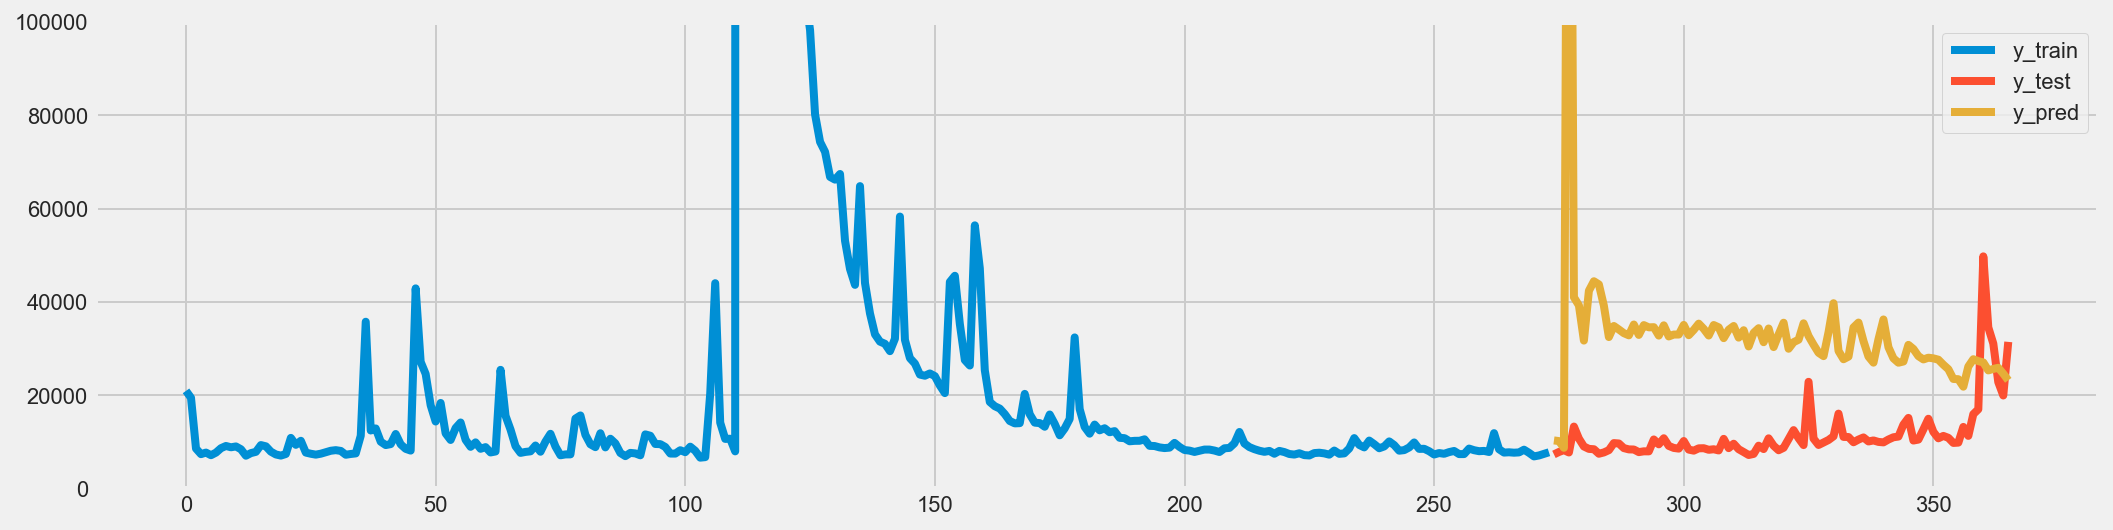

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import ReducedRegressionForecaster

regressor = RandomForestRegressor(random_state=SEED)

window_length = 7
forecaster = ReducedRegressionForecaster(regressor, window_length=window_length)
forecaster.fit(y_train)

# forecaster horizon
fh = np.arange(len(y_test)) + 1
y_pred = forecaster.predict(fh)

# plot
plot_ys(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.ylim(0,100_000)

# model eval
df_eval = get_ts_eval('random_forest',f'window_length={window_length}',y_test,y_pred,df_eval)

# Modelling: sktime arima

In [40]:
from sktime.forecasting.arima import AutoARIMA

In [41]:
AutoARIMA?

Init signature:
AutoARIMA(
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    sp=1,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=False,
    error_action='warn',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept=True,
    **kwargs,
)
Docstring:     
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal parameters
for an ARIMA model, settling on a single fitted ARIMA model. This
process is based on the commonly-used 

/Users/poudel/opt/miniconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


,Model,Description,MAPE,SMAPE,RMSE,ME,MAE,MPE,CORR,MINMAX,ACF1
0,naive_forecaster,dynamic,14,14.5641,"4,787",257,"2,187",-0,0.6975,0.1259,-0.2976
1,naive_forecaster,strategy=last,24,30.3809,"7,348","3,777","3,815",0,nan,0.2394,0.6551
2,random_forest,window_length=7,241,96.2428,"32,563","-21,745","22,737",-2,-0.1260,0.6312,0.0634
3,auto_arima,sp=12,98,194.4429,"13,088","11,407","11,407",1,-0.1225,0.9810,0.6557


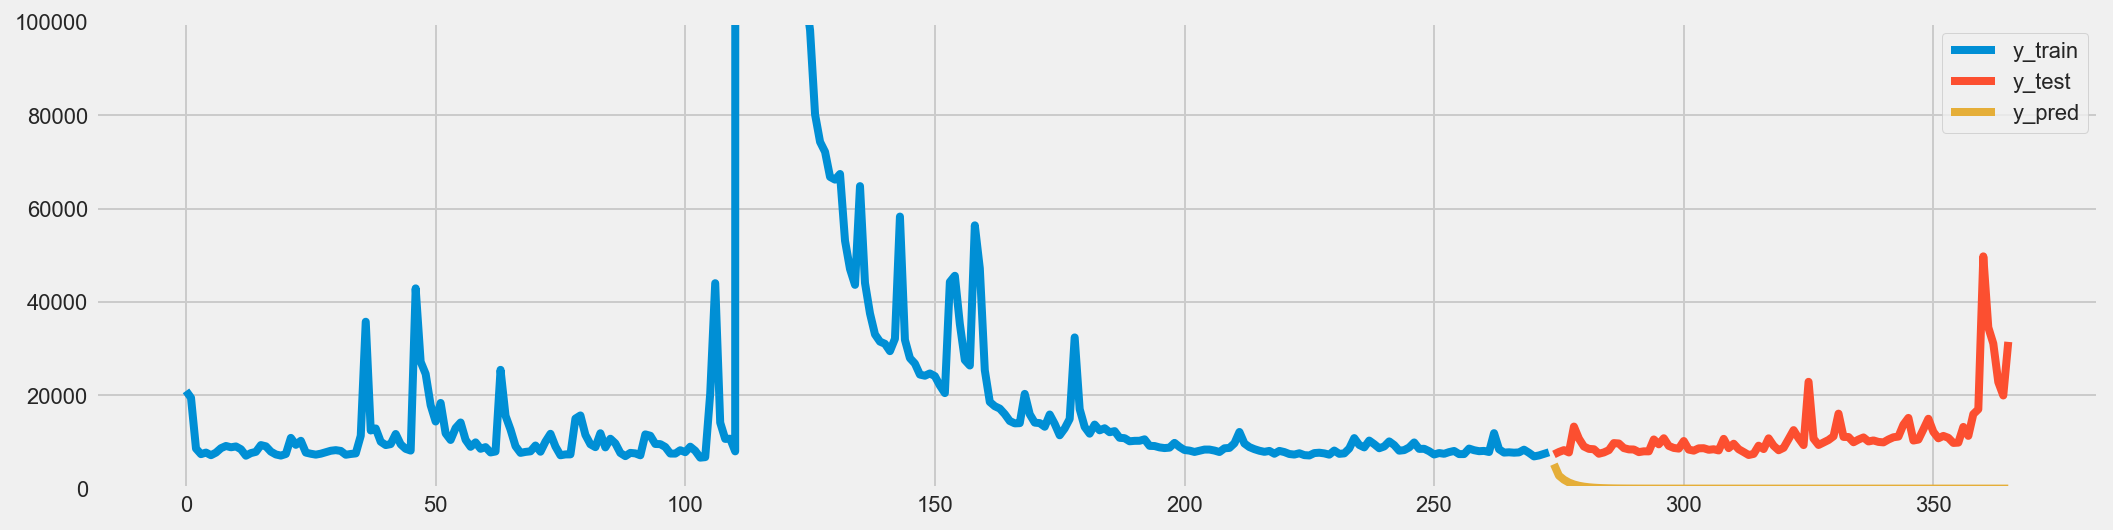

In [46]:
from sktime.forecasting.arima import AutoARIMA

sp = 12 # sp =1 for daily data
forecaster = AutoARIMA(sp=sp,random_state=SEED)
forecaster.fit(y_train)

fh = np.arange(len(y_test)) + 1
y_pred = forecaster.predict(fh)

plot_ys(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.ylim(0,100_000)

df_eval = get_ts_eval('auto_arima',f'sp={sp}',y_test,y_pred,df_eval)

## Dynamic Forecasting
Ref: https://github.com/alan-turing-institute/sktime/blob/master/examples/01_forecasting.ipynb

/Users/poudel/opt/miniconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


,Model,Description,MAPE,SMAPE,RMSE,ME,MAE,MPE,CORR,MINMAX,ACF1
0,naive_forecaster,dynamic,14,14.5641,"4,787",257,"2,187",-0,0.6975,0.1259,-0.2976
1,naive_forecaster,strategy=last,24,30.3809,"7,348","3,777","3,815",0,nan,0.2394,0.6551
2,random_forest,window_length=7,241,96.2428,"32,563","-21,745","22,737",-2,-0.1260,0.6312,0.0634
3,auto_arima,sp=12,98,194.4429,"13,088","11,407","11,407",1,-0.1225,0.9810,0.6557


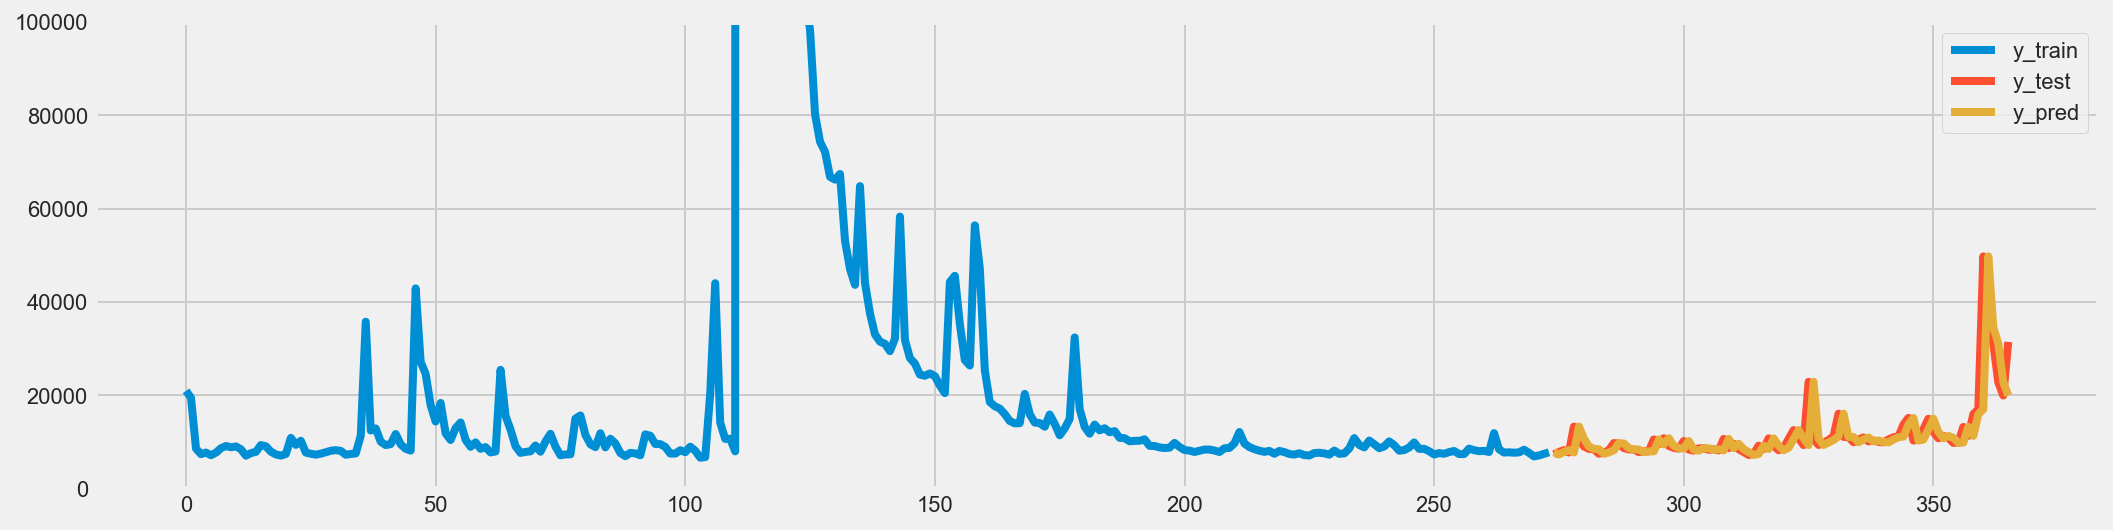

In [43]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import SlidingWindowSplitter

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)

cv = SlidingWindowSplitter(fh=1)

y_pred = forecaster.update_predict(y_test, cv)

plot_ys(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.ylim(0,100_000)

df_eval = get_ts_eval('naive_forecaster',f'dynamic',y_test,y_pred,df_eval)

# Time Taken

In [44]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 1 min 26 secs
